In [1]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import os
from dotenv import load_dotenv

In [15]:
device = "cpu"
print(f"Using device: {device}")

# Environment and Path Configuration
load_dotenv()
BASE_DIR = os.getenv('FILE_PATH')
if not BASE_DIR:
    raise ValueError("FILE_PATH environment variable not set. Please create a .env file and set it.")

DATA_PATH = os.path.join(BASE_DIR, 'Full_preprocessed_detailed_house.csv')
print(f"Base Directory: {BASE_DIR}")
print(f"Data CSV Path: {DATA_PATH}")

df = pd.read_csv(DATA_PATH)

print(df['woningtype'].unique())

Using device: cpu
Base Directory: ../../data/
Data CSV Path: ../../data/Full_preprocessed_detailed_house.csv
['Corridorflat' 'Eindwoning' 'Portiekflat' 'Hoekwoning'
 'Geschakelde 2-onder-1-kapwoning' 'Bovenwoning' 'Vrijstaande woning'
 'Tussenwoning' 'Galerijflat' 'Maisonnette' 'Halfvrijstaande woning'
 'Benedenwoning' '2-onder-1-kapwoning' 'Geschakelde woning'
 'Portiekwoning']


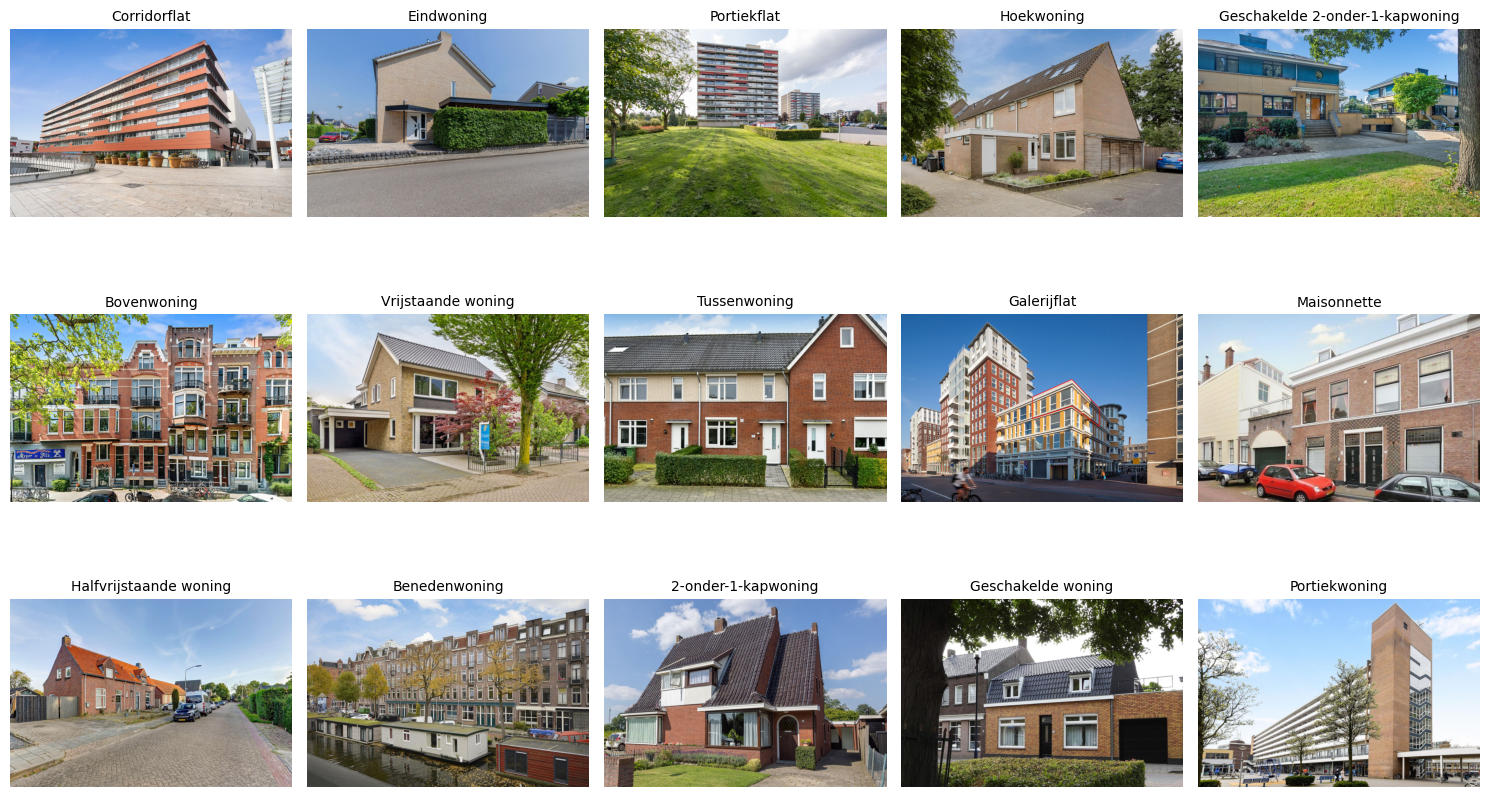

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

classes = df['woningtype'].unique()
class_paths = []

for woningtype in classes:
    if woningtype == 'Tussenwoning':
        path = df.loc[df['woningtype'] == woningtype, 'full_image_path'].iloc[3]
    elif woningtype == 'Galerijflat':
        path = df.loc[df['woningtype'] == woningtype, 'full_image_path'].iloc[3]
    else:
        path = df.loc[df['woningtype'] == woningtype, 'full_image_path'].iloc[0]
    class_paths.append(path)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.axis('off')

    img = mpimg.imread(class_paths[i])
    ax.imshow(img)
    ax.set_title(classes[i], fontsize=10)

plt.subplots_adjust(wspace=0.1, hspace=0.3)

plt.tight_layout()
plt.show()